# House Prediction Model

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

### Loading data from banglore dataset 

In [4]:
df=pd.read_csv('data.csv')
df.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [5]:
df.shape

(13320, 9)

In [6]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

### Dropping unneccesary

In [7]:
df=df.drop(['area_type','society','balcony','availability'],axis='columns')
df.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

### Handling NULL values

In [8]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df=df.dropna()

In [10]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

### Making new column bhk for bedrooms

In [12]:
df['bhk']=df['size'].apply(lambda x: int(x.split(' ')[0]))

In [13]:
df.head()

location       size total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2

### Improving Total Sqft and making it Standardised

In [14]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df[~df['total_sqft'].apply(is_float)].head(10)

location       size      total_sqft  bath    price  bhk
30            Yelahanka      4 BHK     2100 - 2850   4.0  186.000    4
122              Hebbal      4 BHK     3067 - 8156   4.0  477.000    4
137  8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005    2
165            Sarjapur      2 BHK     1145 - 1340   2.0   43.490    2
188            KR Puram      2 BHK     1015 - 1540   2.0   56.800    2
410             Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500    1
549         Hennur Road      2 BHK     1195 - 1440   2.0   63.770    2
648             Arekere  9 Bedroom       4125Perch   9.0  265.000    9
661           Yelahanka      2 BHK     1120 - 1145   2.0   48.130    2
672        Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000    4

In [17]:
def convert_sqrt_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
convert_sqrt_to_num('2166')

2166.0

In [19]:
convert_sqrt_to_num('2100 - 2850')

2475.0

In [20]:
convert_sqrt_to_num('34.46 Sq. Meter')

In [21]:
df1=df.copy()
df1['total_sqft']=df1['total_sqft'].apply(convert_sqrt_to_num)
df1.head(5)

location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2

### Adding new Parameter total_sqft

In [22]:
df2=df1.copy()
df2['price_per_sqft']=df1['price']*100000/df1['total_sqft']
df2.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

### Handling Location Attribute

In [23]:
len(df2['location'].unique())

1304

In [24]:
df2.location=df2.location.apply(lambda x: x.strip())
location_stats=df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [25]:
len(location_stats[location_stats<=10])

1052

In [26]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [27]:
len(df2.location.unique())

1293

In [28]:
df2.location=df2.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df2.location.unique())

242

In [29]:
df2.head(10)

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   
5                Whitefield      2 BHK      1170.0   2.0   38.00    2   
6          Old Airport Road      4 BHK      2732.0   4.0  204.00    4   
7              Rajaji Nagar      4 BHK      3300.0   4.0  600.00    4   
8              Marathahalli      3 BHK      1310.0   3.0   63.25    3   
9                     other  6 Bedroom      1020.0   6.0  370.00    6   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000  
5     3247.863248  
6     7467.057101  
7    18181.818182  
8     4828.244275  
9    36274.509804

In [30]:
df2[df2.total_sqft/df2.bhk<100].head()

location       size  total_sqft  bath  price  bhk  price_per_sqft
45     HSR Layout  8 Bedroom       600.0   9.0  200.0    8    33333.333333
349         other  3 Bedroom        11.0   3.0   74.0    3   672727.272727
770         other  9 Bedroom       600.0   9.0  190.0    9    31666.666667
857   Vijayanagar  8 Bedroom       600.0   4.0   72.0    8    12000.000000
992  Rajaji Nagar  4 Bedroom       315.0   4.0   90.0    4    28571.428571

In [31]:
df3=df2[~(df2.total_sqft/df2.bhk<100)]
df3.shape

(13206, 7)

In [32]:
df3.price_per_sqft.describe()

count     13160.000000
mean       6666.830652
std        4508.228739
min         267.829813
25%        4262.948207
50%        5425.015738
75%        7285.438507
max      176470.588235
Name: price_per_sqft, dtype: float64

### Removing Outliers

In [33]:
def remove_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        n=np.mean(subdf.price_per_sqft)
        st=np.mean(subdf.price_per_sqft)
        reduced_df=subdf[((subdf.price_per_sqft>(n-st)) & (subdf.price_per_sqft<=(n+st)))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df4=remove_outliers(df3)
df4.shape

(12618, 7)

### Data Plotting

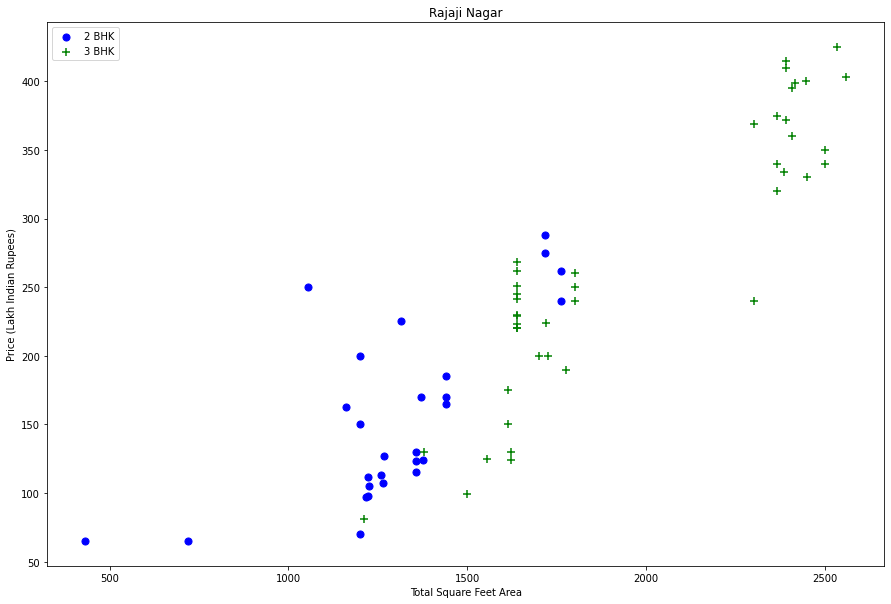

In [34]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df4,"Rajaji Nagar")

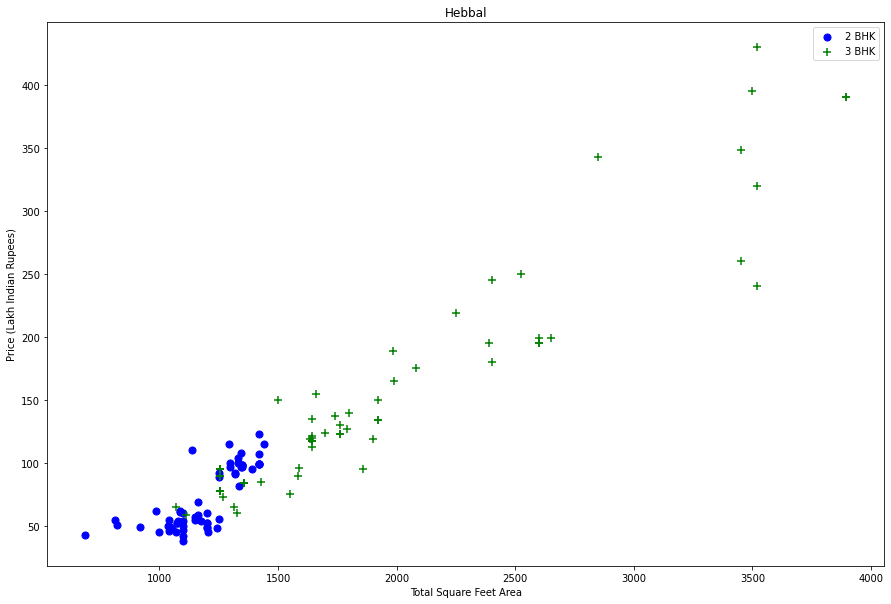

In [35]:
plot_scatter_chart(df4,"Hebbal")

In [36]:
def remove_bhk_outlier(df):
    excluded_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                excluded_indices=np.append(excluded_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(excluded_indices,axis='index')

df5=remove_bhk_outlier(df4)
df5.shape

(9024, 7)

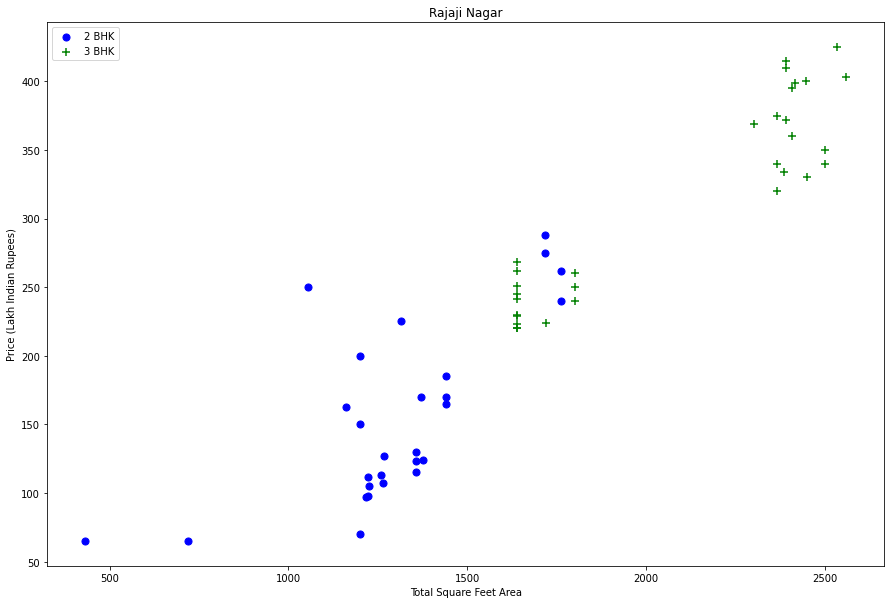

In [37]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Rajaji Nagar")

Text(0, 0.5, 'Count')

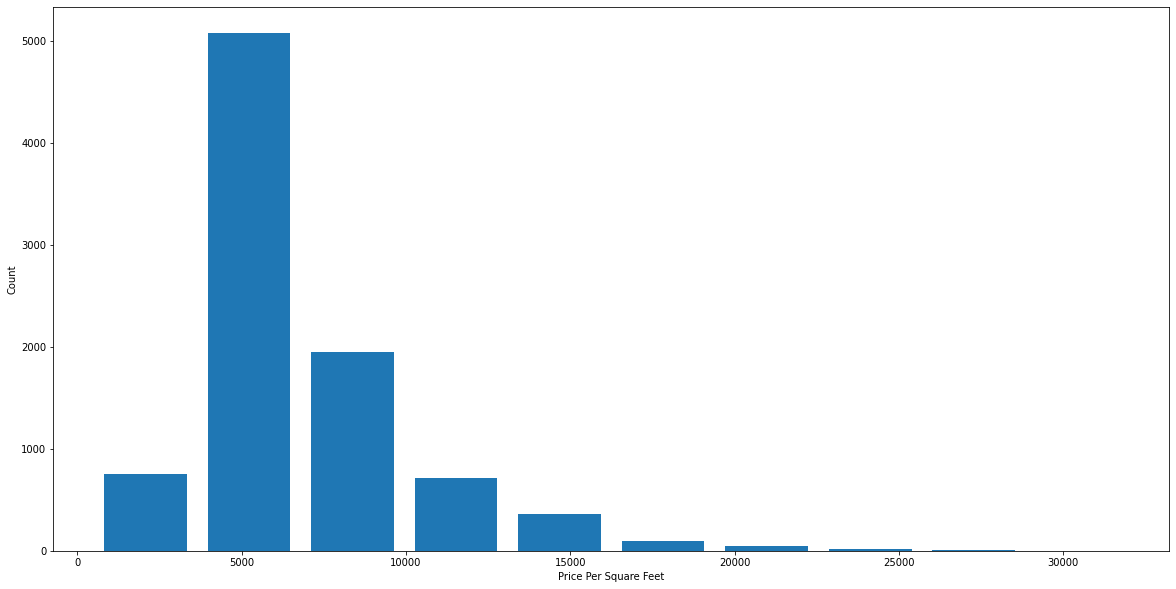

In [38]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df5.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [39]:
df5.bath.unique()

array([ 4.,  3.,  6.,  2.,  7.,  5.,  1.,  8.,  9., 10., 11., 12., 14.,
       27., 16., 13.])

In [40]:
df5[df5.bath>10]

location        size  total_sqft  bath  price  bhk  \
4622           Jigani  10 Bedroom      1200.0  11.0  105.0   10   
4652         KR Puram   8 Bedroom      1200.0  12.0  110.0    8   
6683   Neeladri Nagar      10 BHK      4000.0  12.0  160.0   10   
10234           other   9 Bedroom      3300.0  14.0  500.0    9   
10361           other      27 BHK      8000.0  27.0  230.0   27   
10368           other  11 Bedroom      1200.0  11.0  170.0   11   
10417           other   8 Bedroom       990.0  12.0  120.0    8   
10731           other      16 BHK     10000.0  16.0  550.0   16   
11565           other      11 BHK      6000.0  12.0  150.0   11   
11938           other      13 BHK      5425.0  13.0  275.0   13   

       price_per_sqft  
4622      8750.000000  
4652      9166.666667  
6683      4000.000000  
10234    15151.515152  
10361     2875.000000  
10368    14166.666667  
10417    12121.212121  
10731     5500.000000  
11565     2500.000000  
11938     5069.124424

Text(0, 0.5, 'Count')

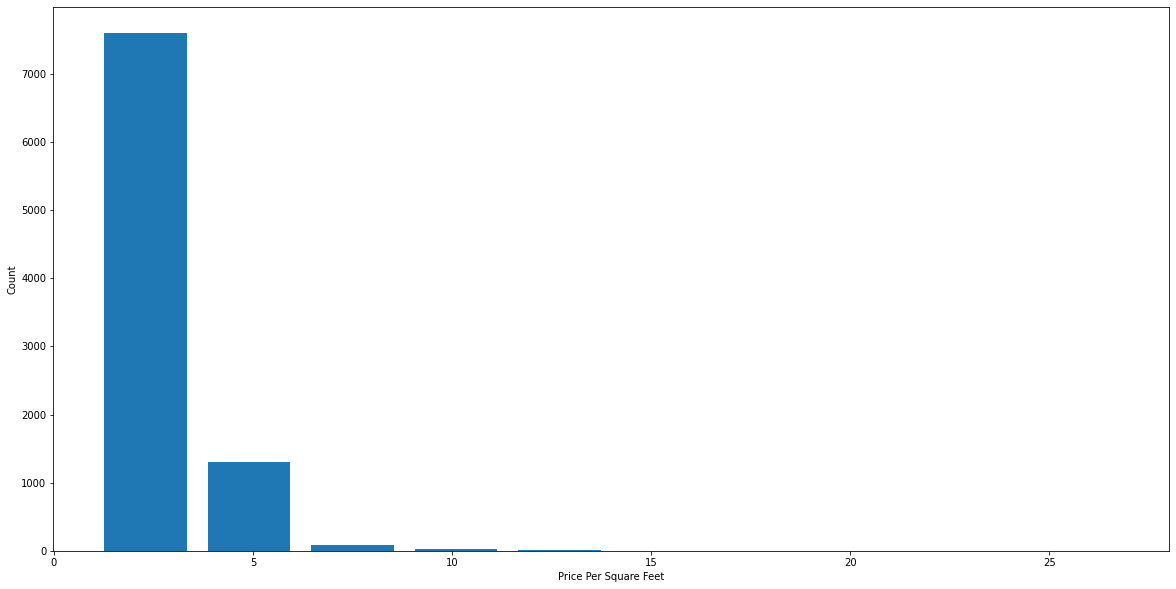

In [41]:

plt.hist(df5.bath,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [42]:
df5[df5.bath>df5.bhk+2]

location       size  total_sqft  bath   price  bhk  price_per_sqft
1870      Chamrajpet  6 Bedroom      1500.0   9.0   230.0    6    15333.333333
2028   Chikkabanavar  4 Bedroom      2460.0   7.0    80.0    4     3252.032520
4652        KR Puram  8 Bedroom      1200.0  12.0   110.0    8     9166.666667
6629      Nagasandra  4 Bedroom      7000.0   8.0   450.0    4     6428.571429
7275    Rajaji Nagar      5 BHK      7500.0   8.0  1700.0    5    22666.666667
8560     Thanisandra      3 BHK      1806.0   6.0   116.0    3     6423.034330
10234          other  9 Bedroom      3300.0  14.0   500.0    9    15151.515152
10417          other  8 Bedroom       990.0  12.0   120.0    8    12121.212121
11953          other  6 Bedroom      1200.0   9.0   122.0    6    10166.666667

In [43]:
df6=df5[df5.bath<df5.bhk+2]
df6.shape

(8909, 7)

In [44]:
df7=df6.drop(['size','price_per_sqft'],axis='columns')
df7.head(10)

location  total_sqft  bath  price  bhk
0  1st Block Jayanagar      2850.0   4.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0  194.0    3
2  1st Block Jayanagar      1200.0   6.0  125.0    6
3  1st Block Jayanagar      1875.0   2.0  235.0    3
4  1st Block Jayanagar      2400.0   4.0  450.0    4
5  1st Block Jayanagar      1000.0   3.0   60.0    2
6  1st Block Jayanagar       930.0   4.0   85.0    7
7  1st Block Jayanagar      1200.0   2.0  130.0    3
8  1st Block Jayanagar      1235.0   2.0  148.0    2
9  1st Block Jayanagar      2750.0   4.0  413.0    4

In [45]:
dummies=pd.get_dummies(df7.location)

In [46]:
dummies

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                        1                   0                          0   
1                        1                   0                          0   
2                        1                   0                          0   
3                        1                   0                          0   
4                        1                   0                          0   
...                    ...                 ...                        ...   
12610                    0                   0                          0   
12612                    0                   0                          0   
12613                    0                   0                          0   
12614                    0                   0                          0   
12617                    0                   0                          0   

       2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                         0                     0                   0   
1                         0                     0                   0   
2                         0                     0                   0   
3                         0                     0                   0   
4                         0                     0                   0   
...                     ...                   ...                 ...   
12610                     0                     0                   0   
12612                     0                     0                   0   
12613                     0                     0                   0   
12614                     0                     0                   0   
12617                     0                     0                   0   

       6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                       0                   0                   0   
1                       0                   0                   0   
2                       0                   0                   0   
3                       0                   0                   0   
4                       0                   0                   0   
...                   ...                 ...                 ...   
12610                   0                   0                   0   
12612                   0                   0                   0   
12613                   0                   0                   0   
12614                   0                   0                   0   
12617                   0                   0                   0   

       9th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0                       0  ...                     0                   0   
1                       0  ...                     0                   0   
2                       0  ...                     0                   0   
3                       0  ...                     0                   0   
4                       0  ...                     0                   0   
...                   ...  ...                   ...                 ...   
12610                   0  ...                     0                   0   
12612                   0  ...                     0                   0   
12613                   0  ...                     0                   0   
12614                   0  ...                     0                   0   
12617                   0  ...                     0                   0   

       Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0                0           0               0          0                   0   
1                0           0               0          0                   0   
2                0           0               0          0                   0   
3                0           0               0          0                   0   
4                0           0               0          0 

In [47]:
df8=pd.concat([df7,dummies.drop('other',axis='columns')],axis='columns')
df8.head()

location  total_sqft  bath  price  bhk  1st Block Jayanagar  \
0  1st Block Jayanagar      2850.0   4.0  428.0    4                    1   
1  1st Block Jayanagar      1630.0   3.0  194.0    3                    1   
2  1st Block Jayanagar      1200.0   6.0  125.0    6                    1   
3  1st Block Jayanagar      1875.0   2.0  235.0    3                    1   
4  1st Block Jayanagar      2400.0   4.0  450.0    4                    1   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0                   0                          0                     0   
1                   0                          0                     0   
2                   0                          0                     0   
3                   0                          0                     0   
4                   0                          0                     0   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0                     0  ...            0                     0   
1                     0  ...            0                     0   
2                     0  ...            0                     0   
3                     0  ...            0                     0   
4                     0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 246 columns]

In [48]:
df9=df8.drop('location',axis='columns')
df9.head(1)

total_sqft  bath  price  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0  428.0    4                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   

   5th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0                   0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  

[1 rows x 245 columns]

In [49]:
df9.shape

(8909, 245)

In [50]:
x=df9.drop('price',axis='columns')
x.head()

total_sqft  bath  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0    4                    1                   0   
1      1630.0   3.0    3                    1                   0   
2      1200.0   6.0    6                    1                   0   
3      1875.0   2.0    3                    1                   0   
4      2400.0   4.0    4                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   

   5th Phase JP Nagar  6th Phase JP Nagar  ...  Vijayanagar  \
0                   0                   0  ...            0   
1                   0                   0  ...            0   
2                   0                   0  ...            0   
3                   0                   0  ...            0   
4                   0                   0  ...            0   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                     0                   0            0           0   
1                     0                   0            0           0   
2                     0                   0            0           0   
3                     0                   0            0           0   
4                     0                   0            0           0   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               0          0                   0            0             0  
1               0          0                   0            0             0  
2               0          0                   0            0             0  
3               0          0                   0            0             0  
4               0          0                   0            0             0  

[5 rows x 244 columns]

In [51]:
y=df9.price
y.head()

0    428.0
1    194.0
2    125.0
3    235.0
4    450.0
Name: price, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [53]:
from sklearn.linear_model import LinearRegression
r=LinearRegression()
r.fit(x_train,y_train)
r.score(x_test,y_test)

0.5720318577875272

In [54]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.81401585, 0.74959371, 0.72301461, 0.72724341, 0.79056406])

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_fit(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        g=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        g.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': g.best_score_,
            'best_params': g.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_fit(x,y)

model  best_score                                 best_params
0  linear_regression    0.760886                        {'normalize': False}
1              lasso    0.667162         {'alpha': 1, 'selection': 'cyclic'}
2      decision_tree    0.731315  {'criterion': 'mse', 'splitter': 'random'}

In [58]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1

    return r.predict([X])[0]

In [59]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

86.75667901908324

In [60]:
predict_price('1st Phase JP Nagar',1000, 3, 2)

87.86733135662837

In [61]:
predict_price('Indira Nagar',1000, 3, 3)

166.87810316772308

In [62]:
predict_price('Indira Nagar',1000, 2, 2)

161.80764279518755

In [63]:
import pickle
with open('homeprice.pickle','wb') as f:
    pickle.dump(r,f)

In [64]:
import json 
columns={
    'data_columns': [col.lower() for col in x.columns]
}

with open('columns.json',"w") as f:
    f.write(json.dumps(columns))